# 911 Calls Capstone Project

This is an analysis of some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). 

The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

from plotly import version
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

%matplotlib inline

In [4]:
df = pd.read_csv('911.csv')

df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


### Top 5 zipcodes for 911 calls

In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

### Top 5 townships (twp) for 911 calls

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

### How many unique 'title' codes are there?

In [8]:
len(df['title'].value_counts())

110

### Creating new features

In the titles column there are "Reasons/Departments" specified before the title code.
These are EMS, Fire, and Traffic.

Use .apply() with a custom lambda expression to create a new column called "Reason"
that contains this string value.

For example, if the title column value is EMS: BACK PAINS/INJURY , 
the Reason column value would be EMS.


In [9]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

### The most common Reason for a 911 call based off of this new column

In [10]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

### Create a countplot of 911 calls by Reason.

    *use seaborn

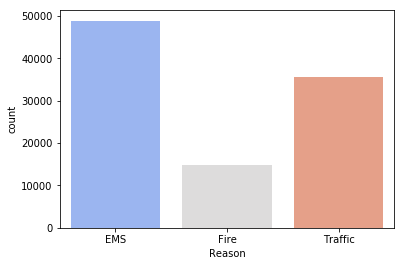

In [11]:
sns.countplot(x='Reason', data= df, palette='coolwarm')

### Focus on time information. 

Data type of the objects in the timeStamp column

In [12]:
type(df['timeStamp'][0])

str

### convert the 'timeStamp' column from strings to DateTime objects

In [13]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

type(df['timeStamp'][0])

pandas._libs.tslib.Timestamp

In [14]:
df['timeStamp'][5]

Timestamp('2015-12-10 17:40:01')

Extract time components eg. Month, hour

In [15]:
print(df['timeStamp'][5].month)
print(df['timeStamp'][5].hour)

12
17


### Create 3 new columns called Hour, Month, and Day_of_Week

In [16]:
df['Month'] = df['timeStamp'].apply(lambda timestamp: timestamp.month)

df['Hour'] = df['timeStamp'].apply(lambda timestamp: timestamp.hour)

df['Day_of_week'] = df['timeStamp'].apply(lambda timestamp: timestamp.weekday())

df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Hour,Day_of_week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,17,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,17,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,12,17,3


 #### Use the .map() with this dictionary to map the actual string names to the day of the week: 

In [17]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

df['Day_of_week'] = df['timeStamp'].apply(lambda timestamp: timestamp.weekday()).map(dmap)

df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Hour,Day_of_week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,17,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,17,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,12,17,Thu


## Use Seaborn to create Plots:

### Day of Week with the hue based off of the Reason

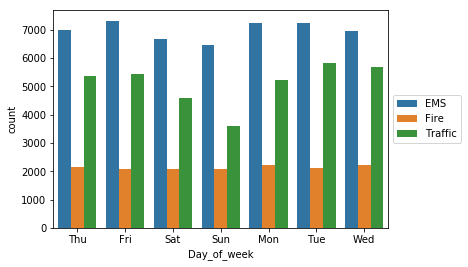

In [18]:
sns.countplot(data=df, x='Day_of_week',hue='Reason')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

### Countplot By Month:

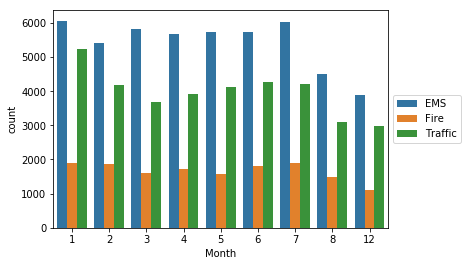

In [19]:
sns.countplot(data=df, x='Month',hue='Reason')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

The dataset is missing some Months, 

fill in this information by possibly a simple line plot that fills in the missing months.

Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation.

In [20]:
byMonth = df.groupby('Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day_of_week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


#### a simple plot off of the dataframe indicating the count of calls per month. 

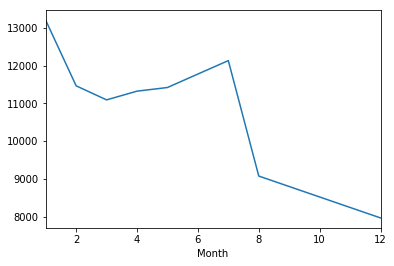

In [21]:
byMonth['twp'].plot()

create a linear fit on the number of calls per month. 
    
Keep in mind you may need to reset the index to a column. 

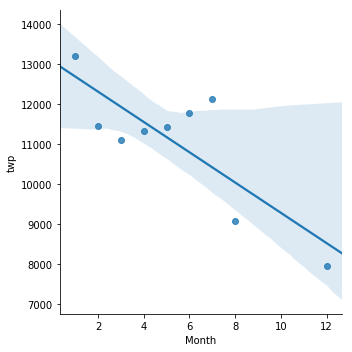

In [22]:
sns.lmplot(data=byMonth.reset_index(), x='Month',y='twp')

Create a new column called 'Date' that contains the date from the timeStamp column. 

You'll need to use apply along with the .date() method. 

In [23]:
df['Date'] = df['timeStamp'].apply(lambda timestamp: timestamp.date())

df.head(3)


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Hour,Day_of_week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,17,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,17,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,12,17,Thu,2015-12-10


groupby this **Date** column with the count() aggregate 

and create a plot of counts of 911 calls.

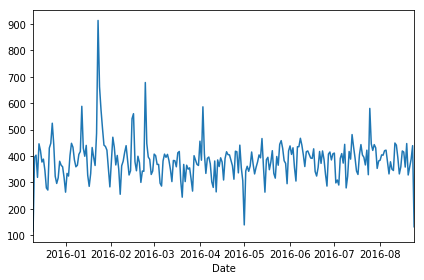

In [24]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

#### Recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call

# Plot representing EMS

Text(0.5,1,'EMS')

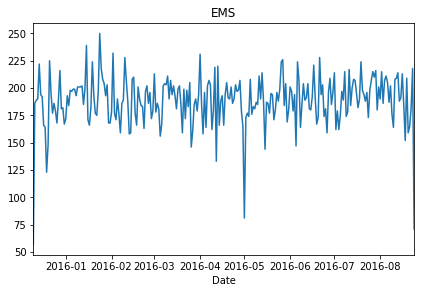

In [25]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('EMS')

# Plot representing Fire

Text(0.5,1,'Fire')

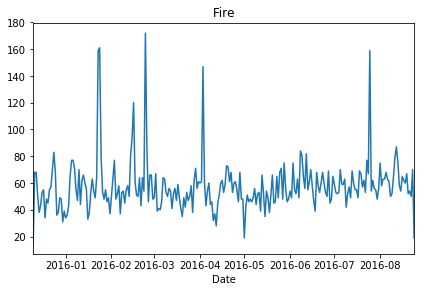

In [26]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Fire')

# Plot representing Traffic

Text(0.5,1,'Traffic')

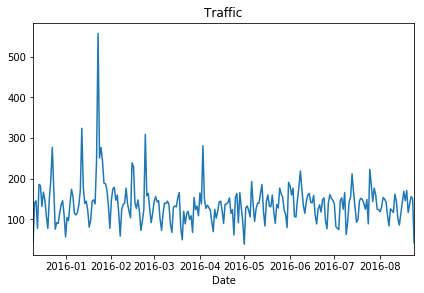

In [27]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Traffic')

## creating heatmaps with seaborn

* ** Restructure the dataframe so that the columns become the Hours**,
* ** Index becomes the Day of the Week.**

There are lots of ways to do this, try to combine groupby with an unstack method. 

In [35]:
dayHour = df.groupby(by=['Day_of_week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day_of_week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


### create a HeatMap using this new DataFrame

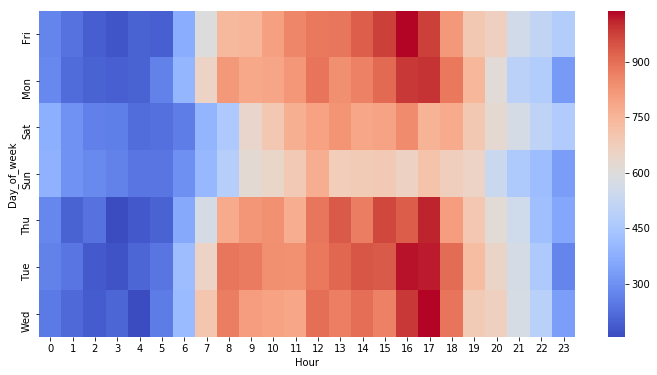

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='coolwarm')

### create a clustermap using this DataFrame. 

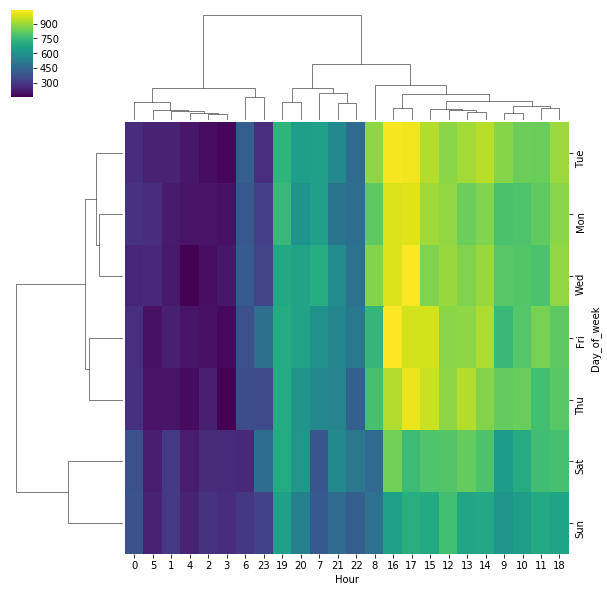

In [30]:
sns.clustermap(dayHour,cmap='viridis')

Repeat these same plots and operations, 

for a DataFrame that shows the **Month** as the column.

In [31]:
dayMonth = df.groupby(by=['Day_of_week','Month']).count()['Reason'].unstack()

dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day_of_week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


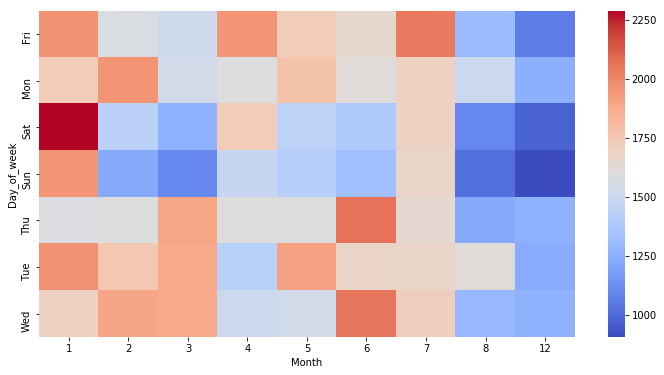

In [32]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap='coolwarm')

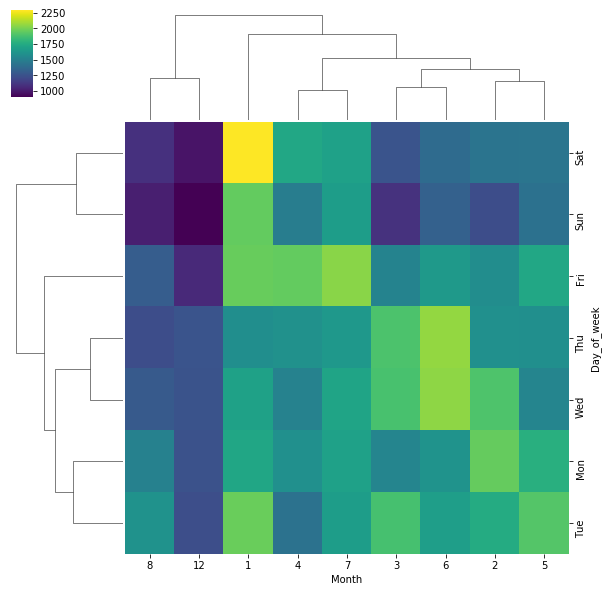

In [33]:
sns.clustermap(dayMonth,cmap='viridis')